## DBQuery 0811

In [34]:
#01,13,21,25,28,31
candidate = {0:1, 1:13, 2:21, 3:25, 4:28, 5:31}
next_round = 1186

In [3]:
## this code was run.
#!pip install keras-tuner
# import numpy as np
# import pandas as pd
import os
from datetime import datetime
from tqdm import tqdm
# print(f'Current Step #01 [now = {datetime.now()}')
from IPython.display import Markdown

from lib.analy_util import ( draw_markdown,
                             draw_graph,
                             draw_scatter,
                             get_pre_bef,
                             draw_average,
                             get_frequency,
                             get_information,
                             analyze_v1,
                             data_prepare,
                             search_model,
                             get_information_v2,
                             get_extdatas,
                             )
print(f'define this code. [{datetime.now()}]')


title = "Metrics"
row_length = 400
new_to_old = True
show_mark_down = True
markdown_table_limit_length = 5

define this code. [2025-08-18 18:10:45.087395]


In [5]:
# Display the variable's value in Markdown
contents = f"###### Updated {datetime.now()}\n\n### {title}\n"
query = 'select round, metric, bonus from results'
query += f' order by round {"desc" if new_to_old else "asc"}'
limit_str = f'limit {row_length}'
query += f' {limit_str if row_length > 0 else ""}'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
table_rows = ["|round|numbers|bonus|sum|0|10|20|30|40|",
              "|--|--|--|--|--|--|--|--|--|"
             ]
rows_dict = {1:[], 10:[], 20:[], 30:[], 40:[]}
nums_t = []
sums = []
cur_table_limit = 0
print(f'row\'s len = {len(rows)}')
candidate_strs = [f"{i}" for i in candidate.values()]
skip_first = True
for row in rows:
    if skip_first:
        row = f"{next_round}|{",".join(candidate_strs)}|0"
        skip_first = False
    cols = row.split('|')
    if len(cols) == 3:
        num_00 = 0
        num_10 = 0
        num_20 = 0
        num_30 = 0
        num_40 = 0
        nums_list = [int(i) for i in cols[1].split(',')]
        for num in nums_list:
            if num < 10:
                num_00 += 1
            if num >= 10 and num < 20:
                num_10 += 1
            if num >= 20 and num < 30:
                num_20 += 1
            if num >= 30 and num < 40:
                num_30 += 1
            if num >= 40 :
                num_40 += 1
        rows_dict[1].append(num_00)
        rows_dict[10].append(num_10)
        rows_dict[20].append(num_20)
        rows_dict[30].append(num_30)
        rows_dict[40].append(num_40)
        if cur_table_limit < markdown_table_limit_length:
            nums=[f"{i:02}" for i in nums_list] 
            table_rows.append(f"|{cols[0]}|{",".join(nums)}|{cols[2]}|{sum(nums_list)}|{num_00}|{num_10}|{num_20}|{num_30}|{num_40}|")
            cur_table_limit += 1
        nums_t.append(nums_list)
        sums.append(sum(nums_list))
sums.reverse()
table_rows_str = "\n".join(table_rows)
contents+=table_rows_str + "\n" + f"###### Updated {datetime.now()}"
Markdown(contents)

row's len = 400


###### Updated 2025-08-14 15:17:41.720292

### Metrics
|round|numbers|bonus|sum|0|10|20|30|40|
|--|--|--|--|--|--|--|--|--|
|1185|01,13,21,25,28,31|0|119|1|1|3|1|0|
|1184|14,16,23,25,31,37|42|146|0|2|2|2|0|
|1183|04,15,17,23,27,36|31|122|1|2|2|1|0|
|1182|01,13,21,25,28,31|22|119|1|1|3|1|0|
|1181|08,10,14,20,33,41|28|126|1|2|1|1|1|
###### Updated 2025-08-14 15:17:41.729674

In [6]:
query = 'select round, metric, bonus from results'
query += f' order by round desc '
query += f'limit 1'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
cols = rows[0].split('|')
latest_nums = [int(i) for i in cols[1].split(',')]

print('latest_nums = ', latest_nums)

latest_nums =  [14, 16, 23, 25, 31, 37]


In [7]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
def get_likey(like_query, next_round):
    rows = !echo "{like_query}" | sqlite3 ../db/metrics.db
    cur_next_round = next_round
    print(f" Round | Metrics{' ' * 16}| Sum | Depth \n{'-'*46}")
    if len(rows) > 0:
        for row in rows:
            cols = row.split("|")
            nums = [int(i) for i in cols[2].split(',')]
            nums_str = [f"{int(i): >2}" for i in nums]
            round_diff = 0
            cur_round = int(cols[1])        
            if next_round > 0:
                round_diff = cur_next_round - cur_round
            cur_next_round = cur_round
            print(f"{cur_round: >6} | {', '.join(nums_str)} | {sum(nums): >3} | {round_diff: >5}")
    else:
        print('data is empty.')


"""
data preparation
"""
#########
# nums_t
nums_by_row = [[] for i in range(6)]
for nums in nums_t:
    for i in range(6):
        nums_by_row[i].append(nums[i])
for i in range(6):
    nums_by_row[i].reverse()

##########
# row_list
row_list = []
row_list_none_last = []
for nums in nums_by_row:
    row_list.append(nums[0:-1])
    row_list_none_last.append(nums[0: len(nums)-1])



In [8]:
# 14,16,23,25,31,37
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"3,%,%,24,%,%\\" order by round desc;'
get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1179 |  3, 16, 18, 24, 40, 44 | 145 |     6
   784 |  3, 10, 23, 24, 31, 39 | 130 |   395
   710 |  3,  4,  9, 24, 25, 33 |  98 |    74
   702 |  3, 13, 16, 24, 26, 29 | 111 |     8


In [77]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where '
like = [
    # 'metric like \\"1,%,%,%,%,40\\" ',
    # 'metric like \\"2,%,%,%,%,40\\" ',
    # 'metric like \\"3,%,%,%,%,40\\" ',
    # 'metric like \\"4,%,%,%,%,40\\" ',
    # 'metric like \\"5,%,%,%,%,40\\" ',
    # 'metric like \\"1,%,%,%,%,41\\" ',
    # 'metric like \\"2,%,%,%,%,41\\" ',
    # 'metric like \\"3,%,%,%,%,41\\" ',
    # 'metric like \\"4,%,%,%,%,41\\" ',
    # 'metric like \\"5,%,%,%,%,41\\" ',
    # 'metric like \\"1,%,%,%,%,42\\" ',
    # 'metric like \\"2,%,%,%,%,42\\" ',
    # 'metric like \\"3,%,%,%,%,42\\" ',
    # 'metric like \\"4,%,%,%,%,42\\" ',
    # 'metric like \\"5,%,%,%,%,42\\" ',
    # 'metric like \\"1,%,%,%,%,43\\" ',
    # 'metric like \\"2,%,%,%,%,43\\" ',
    # 'metric like \\"3,%,%,%,%,43\\" ',
    # 'metric like \\"4,%,%,%,%,43\\" ',
    # 'metric like \\"5,%,%,%,%,43\\" ',
    # 'metric like \\"1,%,%,%,%,44\\" ',
    # 'metric like \\"2,%,%,%,%,44\\" ',
    # 'metric like \\"3,%,%,%,%,44\\" ',
    # 'metric like \\"4,%,%,%,%,44\\" ',
    # 'metric like \\"5,%,%,%,%,44\\" ',
    'metric like \\"1,%,%,%,%,45\\" ',
    'metric like \\"2,%,%,%,%,45\\" ',
    'metric like \\"3,%,%,%,%,45\\" ',
    'metric like \\"4,%,%,%,%,45\\" ',
    'metric like \\"5,%,%,%,%,45\\" ',
]
like_query += " or ".join(like)
like_query += "order by round desc"

get_likey(like_query, next_round)

 Round | Metrics                | Sum | Depth 
----------------------------------------------
  1137 |  4,  9, 12, 15, 33, 45 | 118 |    46
  1119 |  1,  9, 12, 13, 20, 45 | 100 |    18
  1111 |  3, 13, 30, 33, 43, 45 | 167 |     8
  1106 |  1,  3,  4, 29, 42, 45 | 124 |     5
  1079 |  4,  8, 18, 24, 37, 45 | 136 |    27
  1075 |  1, 23, 24, 35, 44, 45 | 172 |     4
  1065 |  3, 18, 19, 23, 32, 45 | 140 |    10
  1061 |  4, 24, 27, 35, 37, 45 | 172 |     4
  1060 |  3, 10, 24, 33, 38, 45 | 153 |     1
  1036 |  2,  5, 22, 32, 34, 45 | 140 |    24
  1022 |  5,  6, 11, 29, 42, 45 | 138 |    14
  1018 |  3, 19, 21, 25, 37, 45 | 150 |     4
  1012 |  5, 11, 18, 20, 35, 45 | 134 |     6
  1003 |  1,  4, 29, 39, 43, 45 | 161 |     9
   969 |  3,  9, 10, 29, 40, 45 | 136 |    34
   960 |  2, 18, 24, 30, 32, 45 | 151 |     9
   943 |  1,  8, 13, 36, 44, 45 | 147 |    17
   939 |  4, 11, 28, 39, 42, 45 | 169 |     4
   904 |  2,  6,  8, 26, 43, 45 | 130 |    35
   896 |  5, 12, 25, 26, 38, 45 

In [60]:
create_query = f'create table results_order(id INTEGER PRIMARY KEY AUTOINCREMENT, round short, n1 short, n2 short, n3 short, n4 short, n5 short, n6 short, bonus short);'
!echo "{create_query}" | sqlite3 ../db/metrics.db

In [64]:
datas = """
1185,17,6,32,28,29,22,38
1184,16,14,23,31,37,25,42
1183,36,4,15,23,17,27,31
1182,31,21,13,25,28,1,22
1181,8,14,20,41,10,33,28
1180,37,40,18,6,12,41,3
1179,44,18,16,24,40,3,21
1178,43,5,27,44,6,11,17
1177,3,43,7,15,19,16,21
1176,30,11,35,9,7,21,29
1175,42,8,4,3,6,32,31
1174,8,17,39,14,36,11,22
1173,30,35,20,1,18,5,3
1172,44,42,40,9,24,7,45
1171,7,3,12,6,17,11,19
1170,3,38,13,28,34,42,25
1169,39,26,24,12,42,5,20
1168,33,9,24,37,21,30,29
1167,35,40,8,31,39,23,24
1166,14,42,25,29,23,27,16
1165,38,29,45,7,6,27,17
1164,25,18,39,23,17,38,22
1163,13,2,33,16,15,43,4
1162,29,28,21,25,22,20,6
1161,2,12,34,24,20,42,37
1160,39,7,36,13,45,18,19
1159,3,28,39,9,38,27,7
1158,38,21,27,25,32,37,20
1157,5,7,20,26,25,12,28
1156,45,39,34,41,30,31,7
1155,19,10,37,27,38,16,13
1154,22,38,32,8,4,26,27
1153,35,9,44,13,1,10,5
1152,31,36,35,37,32,30,5
1151,27,29,9,3,15,2,8
1150,45,18,39,35,9,8,25
1149,21,15,8,32,36,19,38
1148,16,22,13,15,6,3,32
1147,7,37,11,26,24,27,32
1146,6,19,17,11,40,43,28
1145,31,33,2,11,44,37,32
1144,34,12,4,26,3,15,6
1143,36,17,27,16,10,28,6
1142,37,41,30,2,28,8,22
1141,21,26,35,12,7,11,20
1140,38,29,10,22,31,7,15
"""

histories = datas.split("\n")
for history in histories:
    cols = history.split(',')
    if len(cols) == 8:
        sel_query = f'select * from results_order where round={cols[0]} and n1={cols[1]} and n1={cols[1]} and n2={cols[2]} and n3={cols[3]} and n4={cols[4]} and n5={cols[5]} and n6={cols[6]};'
        results = !echo "{sel_query}" | sqlite3 ../db/metrics.db
        if len(results) == 0:
            insert_query = f'insert into results_order(round, n1, n2, n3, n4, n5, n6, bonus) values({cols[0]}, {cols[1]}, {cols[2]}, {cols[3]}, {cols[4]}, {cols[5]}, {cols[6]}, {cols[7]});'
            !echo "{insert_query}" | sqlite3 ../db/metrics.db


In [4]:
def draw_frequency(row_nums=[], next_nums=[0]):
    sel_query_0 = 'select '
    sel_query_2 = ' from results_order order by round asc;'
    sel_query_1 = []
    if len(row_nums) != len(next_nums):
        print("error : row_nums와 next_nums의 크기가 다릅니다.")
        return 
    for row_num in row_nums:
        sel_query_1.append(f'n{row_num}')
    sel_query = sel_query_0 + ", ".join(sel_query_1) + sel_query_2
    rows = !echo "{sel_query}"|sqlite3 ../db/metrics.db
    # print(rows)
    latest_nums = rows[-1]
    results = []
    for i in range(len(row_nums)):
        results.append([])
    for row in rows:
        cols = row.split("|")
        for i in range(len(cols)):
            results[i].append(int(cols[i]))
        # results.append([int(i) for i in row[0]])
    for result in results:
        print(result)
    for i in range(len(results)):
        results[i].append(next_nums[i])
        
    results += next_nums
    ext_datas = []
    show_cols = []
    
    for i in range(len(row_nums)):
        show_cols.append(i)
    
    print(f'show_cols = {show_cols}')
    
    show_label = True
    
    legend_right_pos = False
    
    show_cnt = len(results)
    
    start_pos = 0
    # show_data = []
    # for i in range(6):
    #     show_data.append(row_list[i][start_pos:-1])
    vline_poses = []
    for i in range(1, show_cnt // 5 + 1):
        vline_poses.append((5*i, 0, 45))
    draw_scatter(Y=results,
                 title=f'Candidated Nums : {latest_nums} / {next_nums}',
                 show_line=True,
                 show_dot=True,
                 show_cols=show_cols,
                 ext_datas=ext_datas,
                 show_label=show_label,
                 legend_right_pos=legend_right_pos,
                 helper_line_nums=[0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45],
                 marker_size=3,
                 fig_size=(12,6),
                 save_fig=False,
                 show_time=False,
                 vline_poses=vline_poses
                )
    print(f'execute this code. [{datetime.now()}]')

In [5]:
query = 'select n1, n2 from results_order order by round asc;'
rows = !echo "{query}"|sqlite3 ../db/metrics.db
print(rows)

['38|29', '21|26', '37|41', '36|17', '34|12', '31|33', '6|19', '7|37', '16|22', '21|15', '45|18', '27|29', '31|36', '35|9', '22|38', '19|10', '45|39', '5|7', '38|21', '3|28', '39|7', '2|12', '29|28', '13|2', '25|18', '38|29', '14|42', '35|40', '33|9', '39|26', '3|38', '7|3', '44|42', '30|35', '8|17', '42|8', '30|11', '3|43', '43|5', '44|18', '37|40', '8|14', '31|21', '36|4', '16|14', '17|6']


In [17]:
next_nums = [17, 6, 32, 28, 29, 22]

[38, 21, 37, 36, 34, 31, 6, 7, 16, 21, 45, 27, 31, 35, 22, 19, 45, 5, 38, 3, 39, 2, 29, 13, 25, 38, 14, 35, 33, 39, 3, 7, 44, 30, 8, 42, 30, 3, 43, 44, 37, 8, 31, 36, 16, 17]
show_cols = [0]


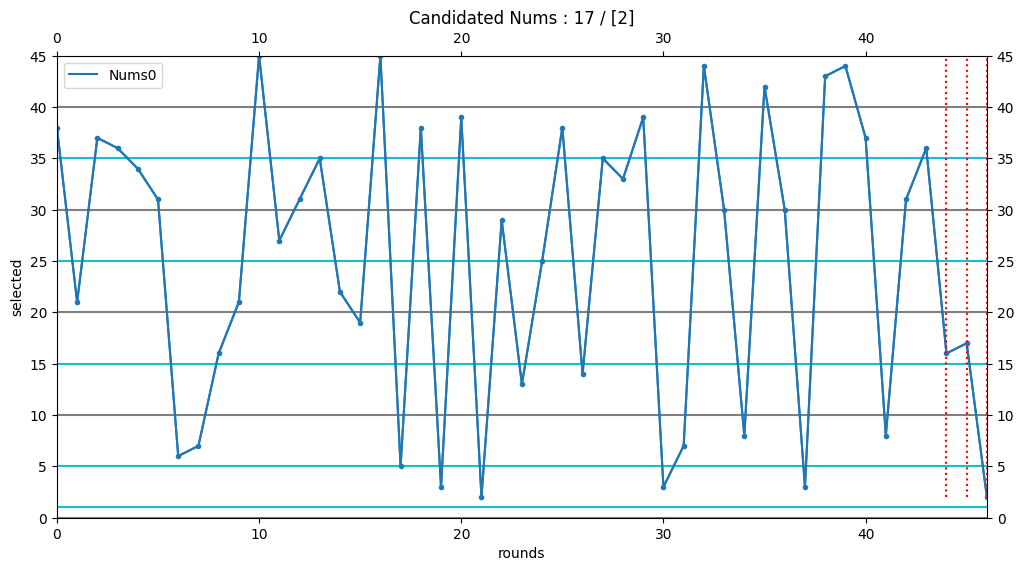

execute this code. [2025-08-18 18:26:07.589786]


In [29]:
row_nums = [1]
next_nums[row_nums[0]-1] = 2
draw_frequency(row_nums=row_nums, next_nums=[next_nums[row_nums[0]-1]])


[29, 26, 41, 17, 12, 33, 19, 37, 22, 15, 18, 29, 36, 9, 38, 10, 39, 7, 21, 28, 7, 12, 28, 2, 18, 29, 42, 40, 9, 26, 38, 3, 42, 35, 17, 8, 11, 43, 5, 18, 40, 14, 21, 4, 14, 6]
show_cols = [0]


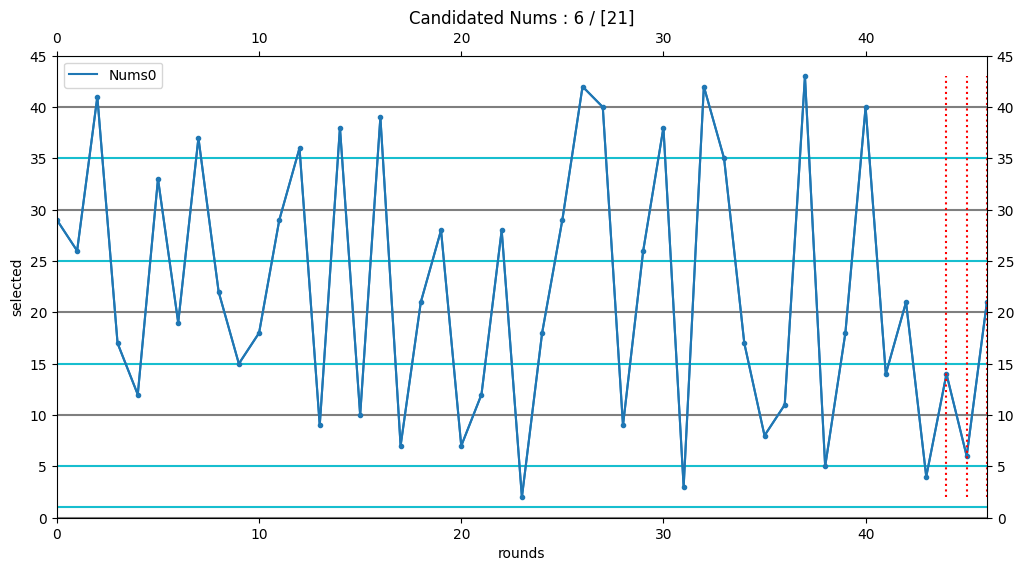

execute this code. [2025-08-18 18:26:53.528826]


In [30]:
row_nums = [2]
next_nums[row_nums[0]-1] = 21
draw_frequency(row_nums=row_nums, next_nums=[next_nums[row_nums[0]-1]])


[10, 35, 30, 27, 4, 2, 17, 11, 13, 8, 39, 9, 35, 44, 32, 37, 34, 20, 27, 39, 36, 34, 21, 33, 39, 45, 25, 8, 24, 24, 13, 12, 40, 20, 39, 4, 35, 7, 27, 16, 18, 20, 13, 15, 23, 32]
show_cols = [0]


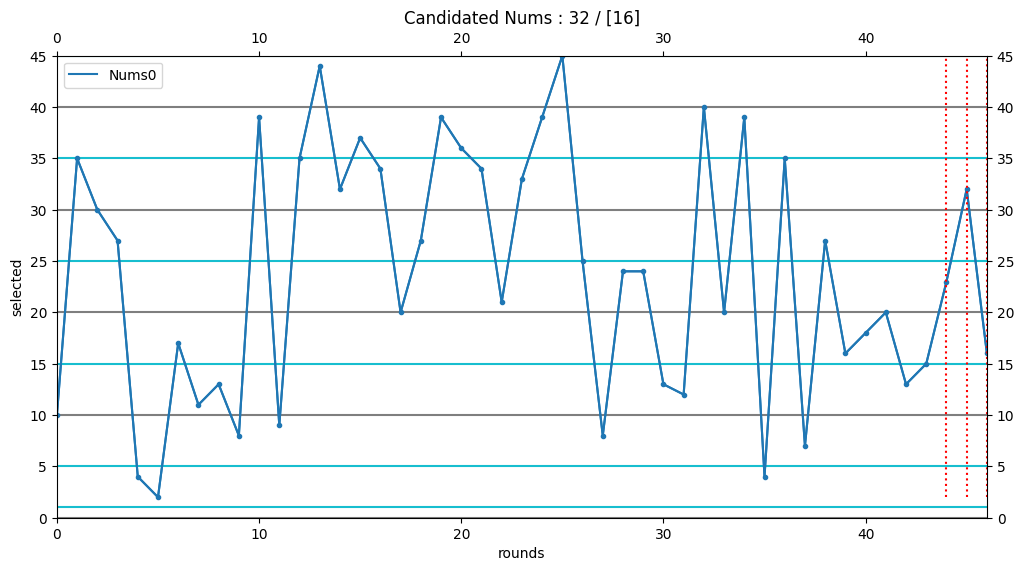

execute this code. [2025-08-18 18:27:57.245449]


In [31]:
row_nums = [3]
next_nums[row_nums[0]-1] = 16
draw_frequency(row_nums=row_nums, next_nums=[next_nums[row_nums[0]-1]])


[22, 12, 2, 16, 26, 11, 11, 26, 15, 32, 35, 3, 37, 13, 8, 27, 41, 26, 25, 9, 13, 24, 25, 16, 23, 7, 29, 31, 37, 12, 28, 6, 9, 1, 14, 3, 9, 15, 44, 24, 6, 41, 25, 23, 31, 28]
show_cols = [0]


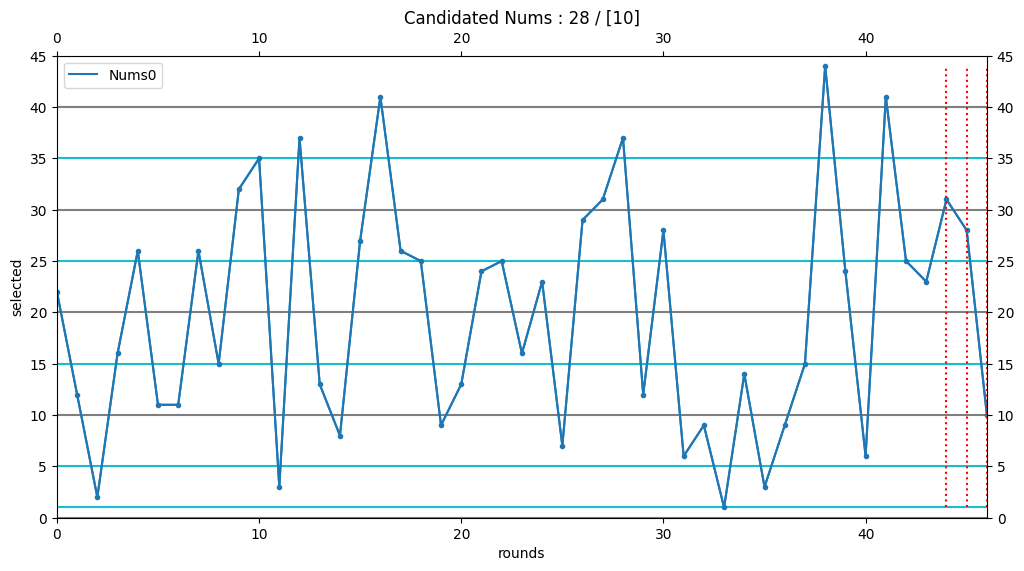

execute this code. [2025-08-18 18:22:35.238875]


In [28]:
row_nums = [4]
next_nums[row_nums[0]-1] = 10
draw_frequency(row_nums=row_nums, next_nums=[next_nums[row_nums[0]-1]])


[31, 7, 28, 10, 3, 44, 40, 24, 6, 36, 9, 15, 32, 1, 4, 38, 30, 25, 32, 38, 45, 20, 22, 15, 17, 6, 23, 39, 21, 42, 34, 17, 24, 18, 36, 6, 7, 19, 6, 40, 12, 10, 28, 17, 37, 29]
show_cols = [0]


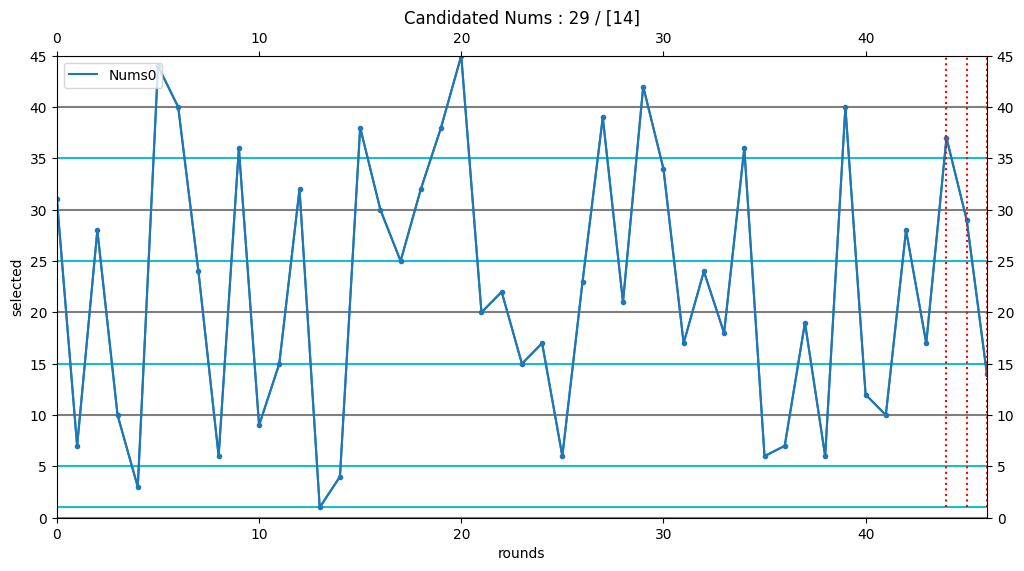

execute this code. [2025-08-18 18:19:03.454574]


In [27]:
row_nums = [5]
next_nums[row_nums[0]-1] = 14
draw_frequency(row_nums=row_nums, next_nums=[next_nums[row_nums[0]-1]])

[7, 11, 8, 28, 15, 37, 43, 27, 3, 19, 8, 2, 30, 10, 26, 16, 31, 12, 37, 27, 18, 42, 20, 43, 38, 27, 27, 23, 30, 5, 42, 11, 7, 5, 11, 32, 21, 16, 11, 3, 41, 33, 1, 27, 25, 22]
show_cols = [0]


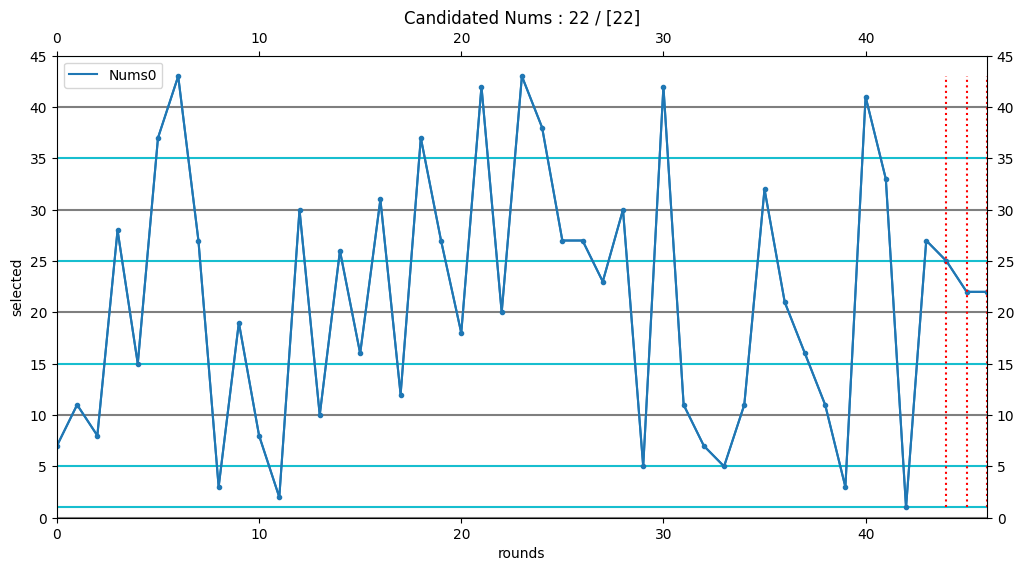

execute this code. [2025-08-18 18:12:33.484135]


In [23]:
row_nums = [6]
next_nums[row_nums[0]-1] = 30
draw_frequency(row_nums=row_nums, next_nums=[next_nums[row_nums[0]-1]])


[38, 21, 37, 36, 34, 31, 6, 7, 16, 21, 45, 27, 31, 35, 22, 19, 45, 5, 38, 3, 39, 2, 29, 13, 25, 38, 14, 35, 33, 39, 3, 7, 44, 30, 8, 42, 30, 3, 43, 44, 37, 8, 31, 36, 16, 17]
[29, 26, 41, 17, 12, 33, 19, 37, 22, 15, 18, 29, 36, 9, 38, 10, 39, 7, 21, 28, 7, 12, 28, 2, 18, 29, 42, 40, 9, 26, 38, 3, 42, 35, 17, 8, 11, 43, 5, 18, 40, 14, 21, 4, 14, 6]
[10, 35, 30, 27, 4, 2, 17, 11, 13, 8, 39, 9, 35, 44, 32, 37, 34, 20, 27, 39, 36, 34, 21, 33, 39, 45, 25, 8, 24, 24, 13, 12, 40, 20, 39, 4, 35, 7, 27, 16, 18, 20, 13, 15, 23, 32]
[22, 12, 2, 16, 26, 11, 11, 26, 15, 32, 35, 3, 37, 13, 8, 27, 41, 26, 25, 9, 13, 24, 25, 16, 23, 7, 29, 31, 37, 12, 28, 6, 9, 1, 14, 3, 9, 15, 44, 24, 6, 41, 25, 23, 31, 28]
[31, 7, 28, 10, 3, 44, 40, 24, 6, 36, 9, 15, 32, 1, 4, 38, 30, 25, 32, 38, 45, 20, 22, 15, 17, 6, 23, 39, 21, 42, 34, 17, 24, 18, 36, 6, 7, 19, 6, 40, 12, 10, 28, 17, 37, 29]
[7, 11, 8, 28, 15, 37, 43, 27, 3, 19, 8, 2, 30, 10, 26, 16, 31, 12, 37, 27, 18, 42, 20, 43, 38, 27, 27, 23, 30, 5, 42, 11, 

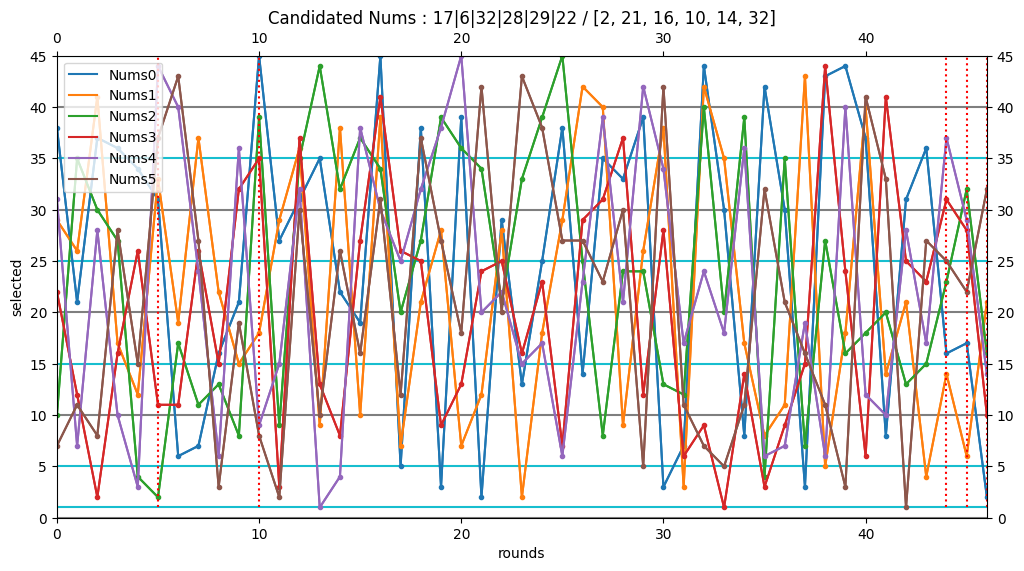

execute this code. [2025-08-18 18:31:15.463687]


In [32]:
row_nums = [1, 2, 3, 4, 5, 6]
draw_frequency(row_nums=row_nums, next_nums=next_nums)


In [33]:
next_nums.sort()
print(next_nums)

[2, 10, 14, 16, 21, 32]
